In [ ]:
import awkward as ak
from coffea.util import load
from coffea import hist
import matplotlib.pyplot as plt
import mplhep
import os
from tqdm import tqdm

import numpy as np

plt.style.use(mplhep.style.CMS)

from coffea.nanoevents.methods import candidate
ak.behavior.update(candidate.behavior)

In [ ]:
def create_plot1d(hist1d, log=False, ax=None):
    lumi = "x"
    
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea
    plt.style.use(mplhep.style.CMS)
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    })
    fill_opts = {
    'alpha': 0.8,
    'edgecolor':(0,0,0,.5)
    }
    
    data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,}

    
    ax = hist.plot1d(hist1d, ax=ax)#, error_opts=data_err_opts)
    
    # CMS style
    
    CMS = plt.text(0.03, 0.93, "CMS",
                  fontsize=22,
                  fontweight='bold',
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
    pre = plt.text(0.03, 0.88, "Preliminary",
                  fontsize=19,
                  fontstyle='italic',
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
    lumi = plt.text(1., 1., r"" + lumi +  "fb$^{-1}$ (13 TeV)",
                fontsize=18,
                fontstyle='normal',
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

    if log:
        ax.set_yscale('log')
        ax.set_ylim(1, None)
    else:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)
    
    axis = hist1d.axes()[0]
    centers = axis.centers()
    values = np.where(hist1d.values().get(()) < 0, 0, hist1d.values().get(()))
    
    # compute mean and std:
    mean = np.sum(values*centers)/np.sum(values)
    std = np.sqrt(np.sum(values*((centers - mean)**2))/np.sum(values))
    
    annotation = TextArea(f"Total: {np.sum(values):.2e}" \
                    + "\n" + f"Mean: {mean:.2e}" \
                    + "\n" + f"Std: {std:.2e}", textprops=dict(size=14))
    
    at = AnchoredOffsetbox('upper right', child=annotation)
    at.patch.set_facecolor('None')
    ax.add_artist(at)
    
    ax.legend().remove()
    
    return ax

In [ ]:
''' 

typ is either 'mc' or 'data'


'''
def plot_comparison(hist_list, legend, typ, log=False):
    
    lumi='x'
    
    for ht in hist_list:
        ax = hist.plot1d(ht)
    
    if typ == 'mc':
        mplhep.cms.label()
    elif typ == 'data':
        CMS = plt.text(0.03, 0.93, "CMS",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )
        pre = plt.text(0.03, 0.88, "Preliminary",
                      fontsize=19,
                      fontstyle='italic',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )
        lumi = plt.text(1., 1., r"" + lumi +  "fb$^{-1}$ (13 TeV)",
                    fontsize=18,
                    fontstyle='normal',
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    transform=ax.transAxes
                   )
        
    
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea
    plt.style.use(mplhep.style.CMS)
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    })
    fill_opts = {
    'alpha': 0.8,
    'edgecolor':(0,0,0,.5)
    }
    
    data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,}
        
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, legend, prop={'size': 16})

    if log:
        ax.set_yscale('log')
        ax.set_ylim(1, None)
    else:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)  
        
    return ax

#  D0 from D* $ cos(\phi) $

 ## $ cos(\phi) $ > 0.990 

In [ ]:
file_cosphi_0p990 = '../output/Charmonium_2017_D0Dstar_cosphi0p990/Charmonium_2017_D0Dstar_cosphi0p990_hists.coffea'

hists_0p990 = load(file_cosphi_0p990)

In [ ]:
create_plot1d(hists_0p990['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

In [ ]:
create_plot1d(hists_0p990['JpsiDstar']['Jpsi_mass'])

In [ ]:
create_plot1d(hists_0p990['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True)        

In [ ]:
create_plot1d(hists_0p990['JpsiDstar']['JpsiDstar_mass'])

In [ ]:
create_plot1d(hists_0p990['JpsiDstar']['JpsiDstar_deltarap'])

 ## $ cos(\phi) $ > 0.985 

In [ ]:
file_cosphi_0p985 = '../output/Charmonium_2017_D0Dstar_cosphi0p985/Charmonium_2017_D0Dstar_cosphi0p985_hists.coffea'

hists_0p985 = load(file_cosphi_0p985)

In [ ]:
create_plot1d(hists_0p985['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

In [ ]:
create_plot1d(hists_0p985['JpsiDstar']['Jpsi_mass'])

In [ ]:
create_plot1d(hists_0p985['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True)        

In [ ]:
create_plot1d(hists_0p985['JpsiDstar']['JpsiDstar_mass'])

In [ ]:
create_plot1d(hists_0p985['JpsiDstar']['JpsiDstar_deltarap'])

 ## $ cos(\phi) $ > 0.980 

In [ ]:
file_cosphi_0p980 = '../output/Charmonium_2017_D0Dstar_cosphi0p980/Charmonium_2017_D0Dstar_cosphi0p980_hists.coffea'

hists_0p980 = load(file_cosphi_0p980)

In [ ]:
create_plot1d(hists_0p980['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

In [ ]:
create_plot1d(hists_0p980['JpsiDstar']['Jpsi_mass'])

In [ ]:
create_plot1d(hists_0p980['JpsiDstar']['JpsiDstar_mass'])

In [ ]:
create_plot1d(hists_0p980['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True)        

In [ ]:
create_plot1d(hists_0p980['JpsiDstar']['JpsiDstar_deltarap'])

 ## $ cos(\phi) $ > 0.975 

In [ ]:
file_cosphi_0p975 = '../output/Charmonium_2017_D0Dstar_cosphi0p975/Charmonium_2017_D0Dstar_cosphi0p975_hists.coffea'

hists_0p975 = load(file_cosphi_0p975)

In [ ]:
create_plot1d(hists_0p975['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

In [ ]:
create_plot1d(hists_0p975['JpsiDstar']['Jpsi_mass'])

In [ ]:
create_plot1d(hists_0p975['JpsiDstar']['JpsiDstar_mass'])

In [ ]:
create_plot1d(hists_0p975['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True)        

In [ ]:
create_plot1d(hists_0p975['JpsiDstar']['JpsiDstar_deltarap'])

 ### Legend

In [165]:
#legend = [r"$cos(\alpha) > 0.990$", r"$cos(\alpha) > 0.985$", r"$cos(\alpha) > 0.980$", r"$cos(\alpha) > 0.975$"]
legend = [r"$cos(\alpha) > 0.990$", r"$cos(\alpha) > 0.975$"]

### Plots

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


(0.0, 85.0)

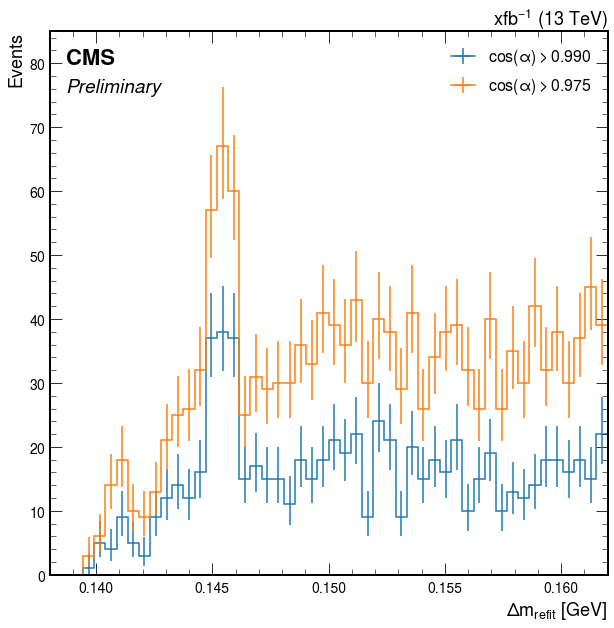

In [166]:
#data_list = (hists_0p990['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_0p985['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),
#             hists_0p980['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_0p975['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))
data_list = (hists_0p990['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_0p975['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),)

ax = plot_comparison(data_list, legend=legend, typ='data')
ax.set_ylim(0, 85)

#  D0 from D* $ p_T $

 ## $ p_T $ > 4.0 GeV

In [118]:
file_D0pt_4 = '../output/Charmonium_2017_D0Dstar_pt4/Charmonium_2017_D0Dstar_pt4_hists.coffea'

hists_4 = load(file_D0pt_4)

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='$p_{T,\\mu^+\\mu^-}$ [GeV]', ylabel='Events'>

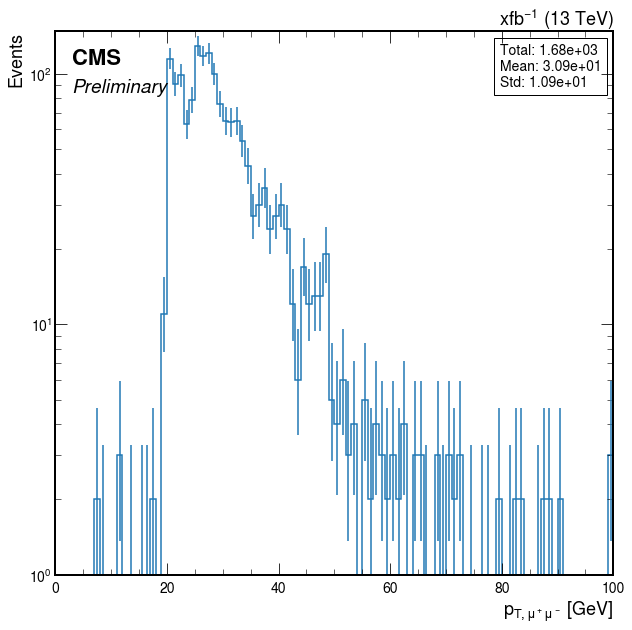

In [119]:
create_plot1d(hists_4['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

 ## $ p_T $ > 3.0 GeV

In [120]:
file_D0pt_3 = '../output/Charmonium_2017_D0Dstar_pt3/Charmonium_2017_D0Dstar_pt3_hists.coffea'

hists_3 = load(file_D0pt_3)

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='$p_{T,\\mu^+\\mu^-}$ [GeV]', ylabel='Events'>

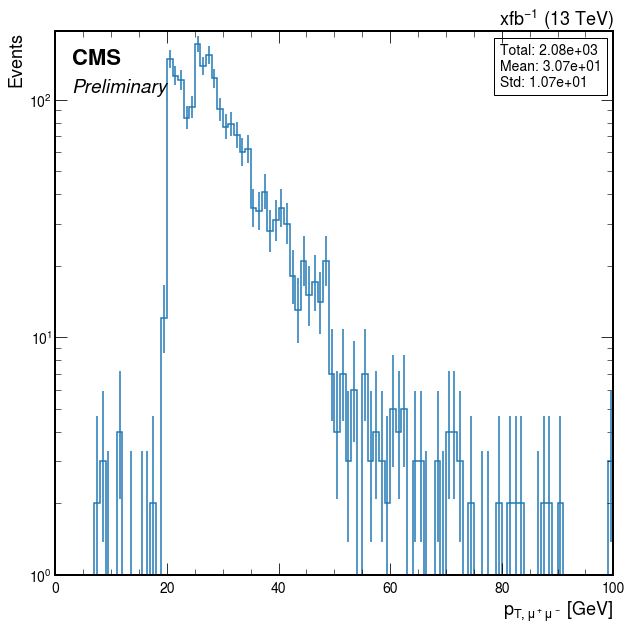

In [121]:
create_plot1d(hists_3['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

 ## $ p_T $ > 2.0 GeV

In [122]:
file_D0pt_2 = '../output/Charmonium_2017_D0Dstar_pt2/Charmonium_2017_D0Dstar_pt2_hists.coffea'

hists_2 = load(file_D0pt_2)

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='$p_{T,\\mu^+\\mu^-}$ [GeV]', ylabel='Events'>

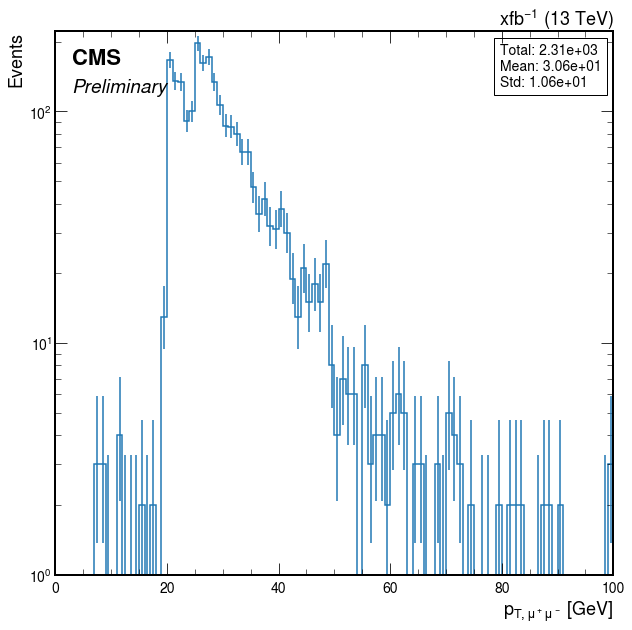

In [123]:
create_plot1d(hists_2['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

 ## $ p_T $ > 1.0 GeV

In [124]:
file_D0pt_1 = '../output/Charmonium_2017_D0Dstar_pt1/Charmonium_2017_D0Dstar_pt1_hists.coffea'

hists_1 = load(file_D0pt_1)

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='$p_{T,\\mu^+\\mu^-}$ [GeV]', ylabel='Events'>

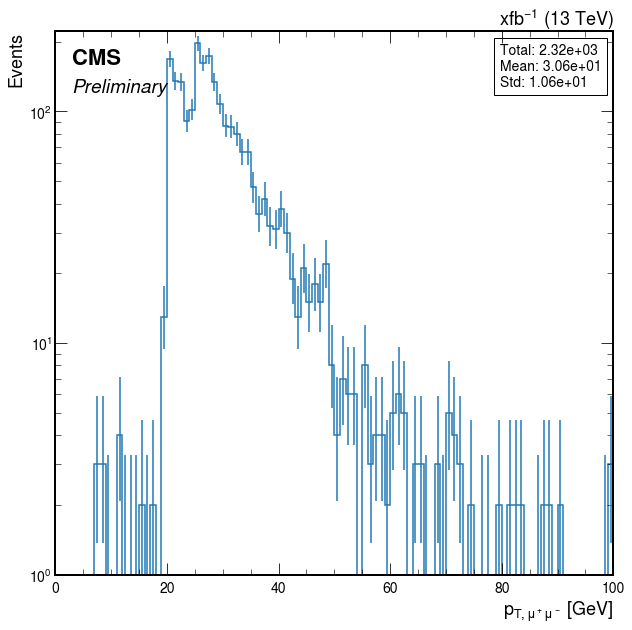

In [125]:
create_plot1d(hists_1['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

 ### Legend

In [160]:
#legend = [r"$ p_T > 4.0 GeV $", r"$ p_T > 3.0 GeV $", r"$ p_T > 2.0 GeV $", r"$ p_T > 1.0 GeV $"]
legend = [r"$ p_T > 4.0 GeV $", r"$ p_T > 1.0 GeV $"]

 ### Plots

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


(0.0, 70.0)

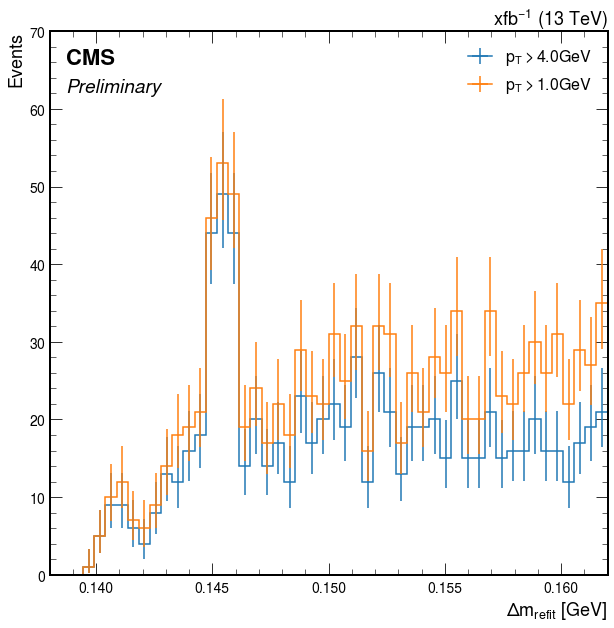

In [161]:
#data_list = (hists_4['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_3['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),
#             hists_2['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_1['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

data_list = (hists_4['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_1['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),)

ax = plot_comparison(data_list, typ='data', legend=legend)
ax.set_ylim(0, 70)

#  D0 (from D*) decay length significance

## dl > 3.0

In [130]:
file_D0dl_3p0 = '../output/Charmonium_2017_D0Dstar_dlSig3p0/Charmonium_2017_D0Dstar_dlSig3p0_hists.coffea'

hists_dl_3p0 = load(file_D0dl_3p0)

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='$p_{T,\\mu^+\\mu^-}$ [GeV]', ylabel='Events'>

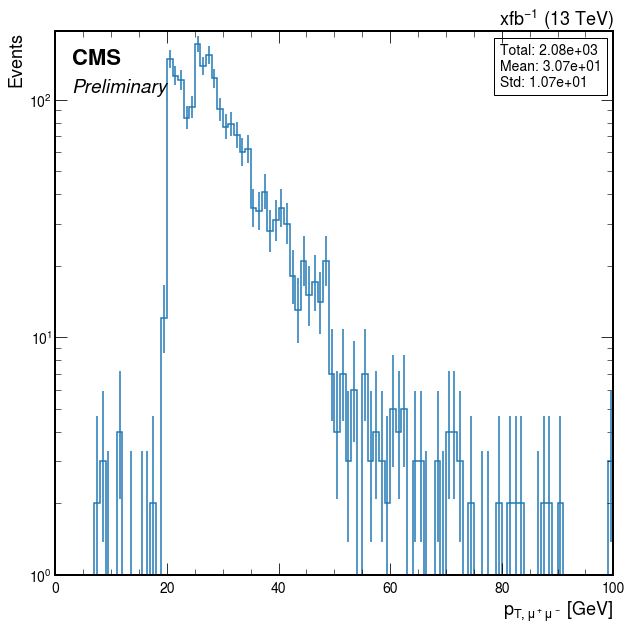

In [131]:
create_plot1d(hists_dl_3p0['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## dl > 2.9

In [132]:
file_D0dl_2p9 = '../output/Charmonium_2017_D0Dstar_dlSig2p9/Charmonium_2017_D0Dstar_dlSig2p9_hists.coffea'

hists_dl_2p9 = load(file_D0dl_2p9)

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='$p_{T,\\mu^+\\mu^-}$ [GeV]', ylabel='Events'>

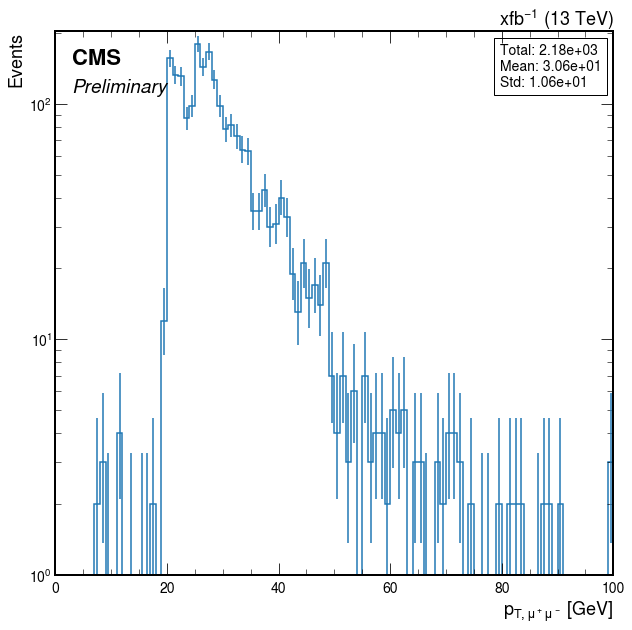

In [133]:
create_plot1d(hists_dl_2p9['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## dl > 2.8

In [135]:
file_D0dl_2p8 = '../output/Charmonium_2017_D0Dstar_dlSig2p8/Charmonium_2017_D0Dstar_dlSig2p8_hists.coffea'

hists_dl_2p8 = load(file_D0dl_2p8)

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='$p_{T,\\mu^+\\mu^-}$ [GeV]', ylabel='Events'>

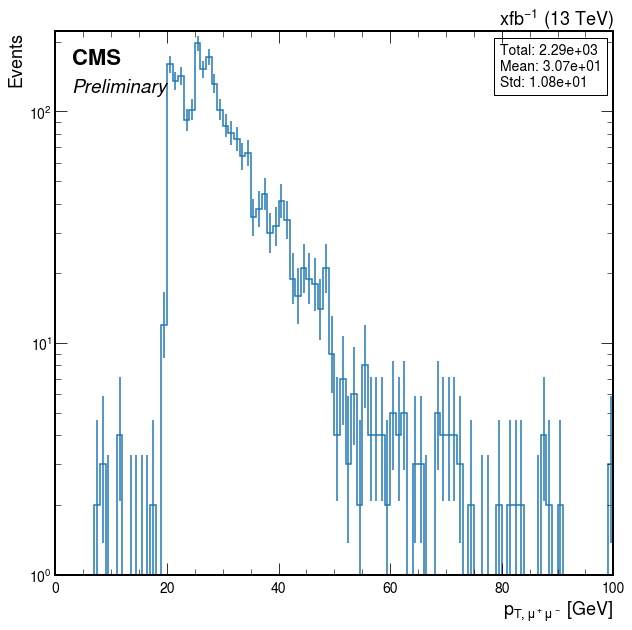

In [136]:
create_plot1d(hists_dl_2p8['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## dl > 2.7

In [138]:
file_D0dl_2p7 = '../output/Charmonium_2017_D0Dstar_dlSig2p7/Charmonium_2017_D0Dstar_dlSig2p7_hists.coffea'

hists_dl_2p7 = load(file_D0dl_2p7)

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='$p_{T,\\mu^+\\mu^-}$ [GeV]', ylabel='Events'>

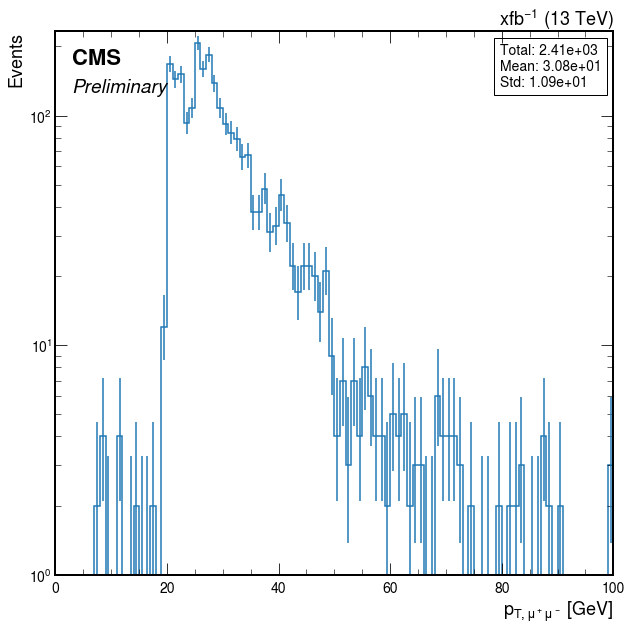

In [139]:
create_plot1d(hists_dl_2p7['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## dl > 2.6

In [140]:
file_D0dl_2p6 = '../output/Charmonium_2017_D0Dstar_dlSig2p6/Charmonium_2017_D0Dstar_dlSig2p6_hists.coffea'

hists_dl_2p6 = load(file_D0dl_2p6)

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='$p_{T,\\mu^+\\mu^-}$ [GeV]', ylabel='Events'>

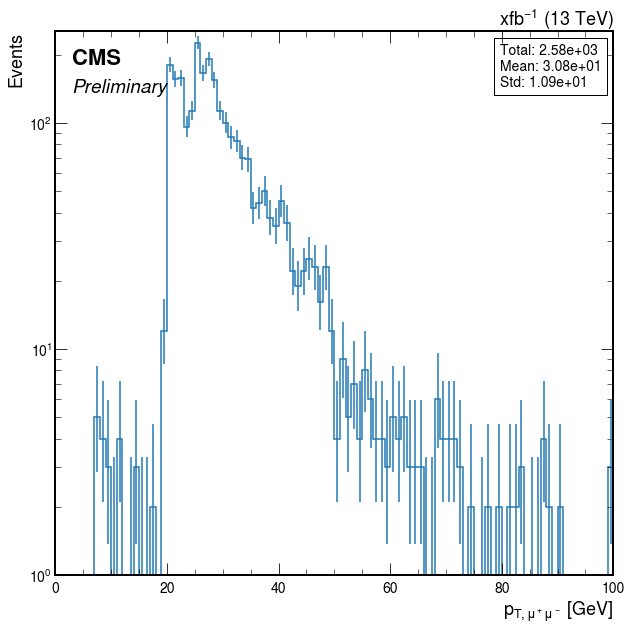

In [141]:
create_plot1d(hists_dl_2p6['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## dl > 2.5

In [142]:
file_D0dl_2p5 = '../output/Charmonium_2017_D0Dstar_dlSig2p5/Charmonium_2017_D0Dstar_dlSig2p5_hists.coffea'

hists_dl_2p5 = load(file_D0dl_2p5)

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='$p_{T,\\mu^+\\mu^-}$ [GeV]', ylabel='Events'>

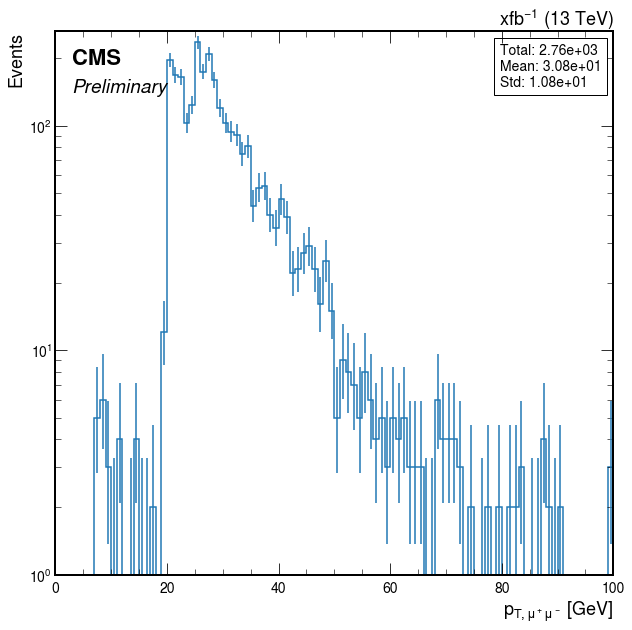

In [143]:
create_plot1d(hists_dl_2p5['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## dl > 2.0

In [144]:
file_D0dl_2p0 = '../output/Charmonium_2017_D0Dstar_dlSig2p0/Charmonium_2017_D0Dstar_dlSig2p0_hists.coffea'

hists_dl_2p0 = load(file_D0dl_2p0)

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='$p_{T,\\mu^+\\mu^-}$ [GeV]', ylabel='Events'>

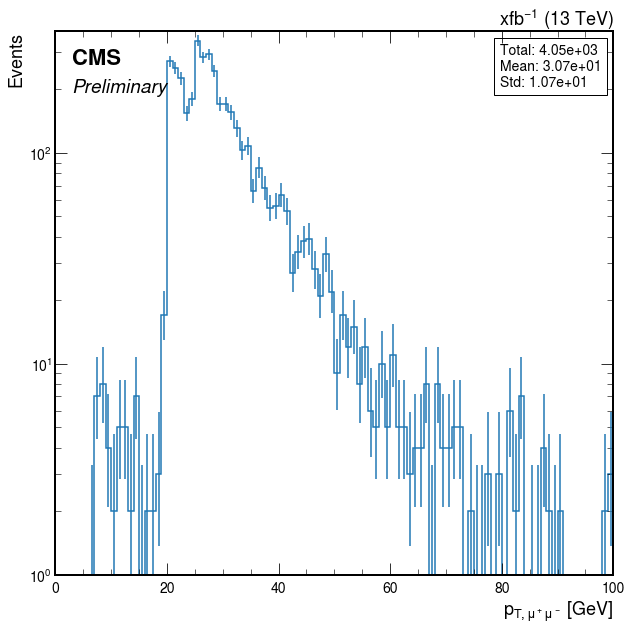

In [145]:
create_plot1d(hists_dl_2p0['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## Legend

In [152]:
#legend = [r"$ dl_{sig} > 3.0  $", r"$ dl_{sig} > 2.9  $", r"$ dl_{sig} > 2.8  $", r"$ dl_{sig} > 2.7  $",
#          r"$ dl_{sig} > 2.6  $", r"$ dl_{sig} > 2.5  $", r"$ dl_{sig} > 2.0  $"]
legend = [r"$ dl_{sig} > 3.0  $", r"$ dl_{sig} > 2.5  $", r"$ dl_{sig} > 2.0  $",]

### Plots

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/min

(0.0, 100.0)

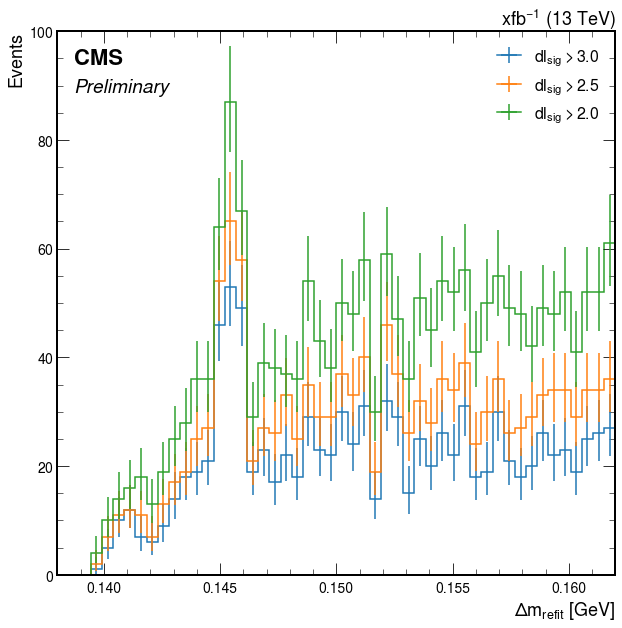

In [155]:
'''data_list = (hists_dl_3p0['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_dl_2p9['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),
             hists_dl_2p8['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_dl_2p7['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),
             hists_dl_2p6['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_dl_2p5['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),
             hists_dl_2p0['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))'''

data_list = (hists_dl_3p0['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_dl_2p5['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),
             hists_dl_2p0['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), )

ax = plot_comparison(data_list, typ='data', legend=legend)
ax.set_ylim(0, 100)

#  Comparison old and new cuts

## old

 * D0 from D* $ cos(\phi) $ > 0.99
 * D0 from D* $ p_T $ > 3 GeV
 * D0 from D* decay length significance > 3

## new

 * D0 from D* $ cos(\phi) $ > 0.975
 * D0 from D* $ p_T $ > 3 GeV
 * D0 from D* decay length significance > 2

## Legend

In [ ]:
legend = ['old cuts', 'new cuts']

## Plots